# Diabetes Prediction using Machine Learning

## Project Overview

This notebook implements a comprehensive diabetes prediction system using the **Pima Indians Diabetes Database**. The dataset contains medical information about Pima Indian women and their diabetes status.

### Dataset Features:
- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration (2 hours in an oral glucose tolerance test)
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skinfold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)²)
- **DiabetesPedigreeFunction**: Diabetes pedigree function (genetic factor)
- **Age**: Age in years
- **Outcome**: Target variable (0 = No Diabetes, 1 = Diabetes)

### Objectives:
1. Perform comprehensive data exploration and preprocessing
2. Build and compare multiple machine learning models
3. Optimize model performance through hyperparameter tuning
4. Create a robust prediction system for diabetes diagnosis

## 1. Import Required Libraries

In [1]:
# Data Processing and Analysis
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve
)

# Model Persistence
import joblib
import pickle

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!
NumPy version: 1.26.4
Pandas version: 2.3.0
Scikit-learn available


## 2. Load and Explore the Dataset

In [2]:
# Load the dataset
data = pd.read_csv('../diabetes.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {data.shape}")
print(f"Memory usage: {data.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Display first few rows
print("\n=== First 5 rows ===")
data.head()

Dataset loaded successfully!
Dataset shape: (768, 9)
Memory usage: 54.13 KB

=== First 5 rows ===


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Basic dataset information
print("=== Dataset Information ===")
print(f"Columns: {list(data.columns)}")
print(f"\nData types:")
print(data.dtypes)
print(f"\nMissing values:")
print(data.isnull().sum())

# Check for duplicate rows
print(f"\nDuplicate rows: {data.duplicated().sum()}")

# Target variable distribution
print(f"\n=== Target Variable Distribution ===")
print(data['Outcome'].value_counts())
print(f"\nPercentage of diabetes cases: {data['Outcome'].mean()*100:.2f}%")

# Basic statistics
print(f"\n=== Descriptive Statistics ===")
data.describe()

=== Dataset Information ===
Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Data types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Duplicate rows: 0

=== Target Variable Distribution ===
Outcome
0    500
1    268
Name: count, dtype: int64

Percentage of diabetes cases: 34.90%

=== Descriptive Statistics ===


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


=== Zero Values Analysis ===
Glucose: 5 zeros (0.7%)
BloodPressure: 35 zeros (4.6%)
SkinThickness: 227 zeros (29.6%)
BMI: 11 zeros (1.4%)
Insulin: 374 zeros (48.7%)


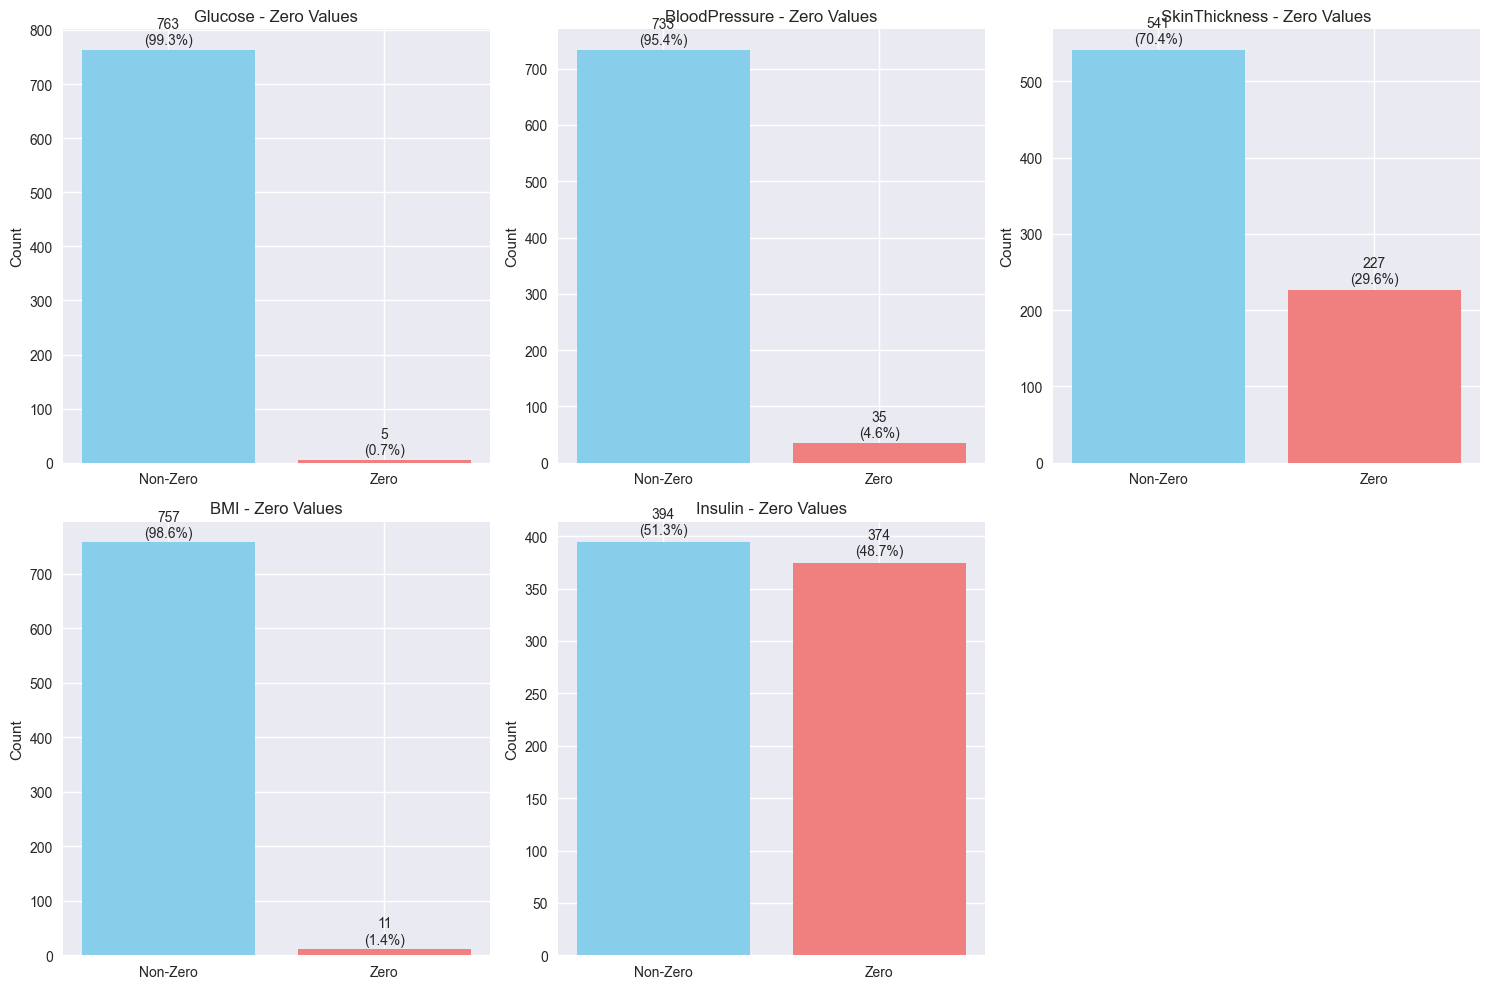

In [4]:
# Check for zero values (which might indicate missing data)
print("=== Zero Values Analysis ===")
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

for col in zero_columns:
    zero_count = (data[col] == 0).sum()
    zero_percent = (zero_count / len(data)) * 100
    print(f"{col}: {zero_count} zeros ({zero_percent:.1f}%)")

# Visualize zero values
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(zero_columns):
    if i < len(axes):
        zero_count = (data[col] == 0).sum()
        non_zero_count = len(data) - zero_count
        
        axes[i].bar(['Non-Zero', 'Zero'], [non_zero_count, zero_count], 
                   color=['skyblue', 'lightcoral'])
        axes[i].set_title(f'{col} - Zero Values')
        axes[i].set_ylabel('Count')
        
        # Add percentage labels
        for j, v in enumerate([non_zero_count, zero_count]):
            axes[i].text(j, v + 5, f'{v}\n({v/len(data)*100:.1f}%)', 
                        ha='center', va='bottom')

# Hide the last subplot if not used
if len(zero_columns) < len(axes):
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()

## 3. Data Preprocessing

Data preprocessing is crucial for machine learning models. We'll handle missing values (zeros), outliers, and feature scaling.

In [5]:
# Create a copy of the data for preprocessing
data_processed = data.copy()

# Columns where 0 is not a valid biological value
zero_not_valid = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

print("=== Handling Missing Values (Zeros) ===")
for col in zero_not_valid:
    # Count zeros before replacement
    zeros_before = (data_processed[col] == 0).sum()
    
    # Replace 0 with NaN
    data_processed[col] = data_processed[col].replace(0, np.nan)
    
    # Fill NaN with median (more robust to outliers than mean)
    median_value = data_processed[col].median()
    data_processed[col] = data_processed[col].fillna(median_value)
    
    print(f"{col}: Replaced {zeros_before} zeros with median ({median_value:.2f})")

print("\nMissing values after preprocessing:")
print(data_processed.isnull().sum().sum())

=== Handling Missing Values (Zeros) ===
Glucose: Replaced 5 zeros with median (117.00)
BloodPressure: Replaced 35 zeros with median (72.00)
SkinThickness: Replaced 227 zeros with median (29.00)
BMI: Replaced 11 zeros with median (32.30)
Insulin: Replaced 374 zeros with median (125.00)

Missing values after preprocessing:
0


=== Outlier Detection (IQR Method) ===
Pregnancies: 4 outliers (0.5%) - Range: [-6.50, 13.50]
Glucose: 0 outliers (0.0%) - Range: [39.00, 201.00]
BloodPressure: 14 outliers (1.8%) - Range: [40.00, 104.00]
SkinThickness: 87 outliers (11.3%) - Range: [14.50, 42.50]
Insulin: 346 outliers (45.1%) - Range: [112.88, 135.88]
BMI: 8 outliers (1.0%) - Range: [13.85, 50.25]
DiabetesPedigreeFunction: 29 outliers (3.8%) - Range: [-0.33, 1.20]
Age: 9 outliers (1.2%) - Range: [-1.50, 66.50]


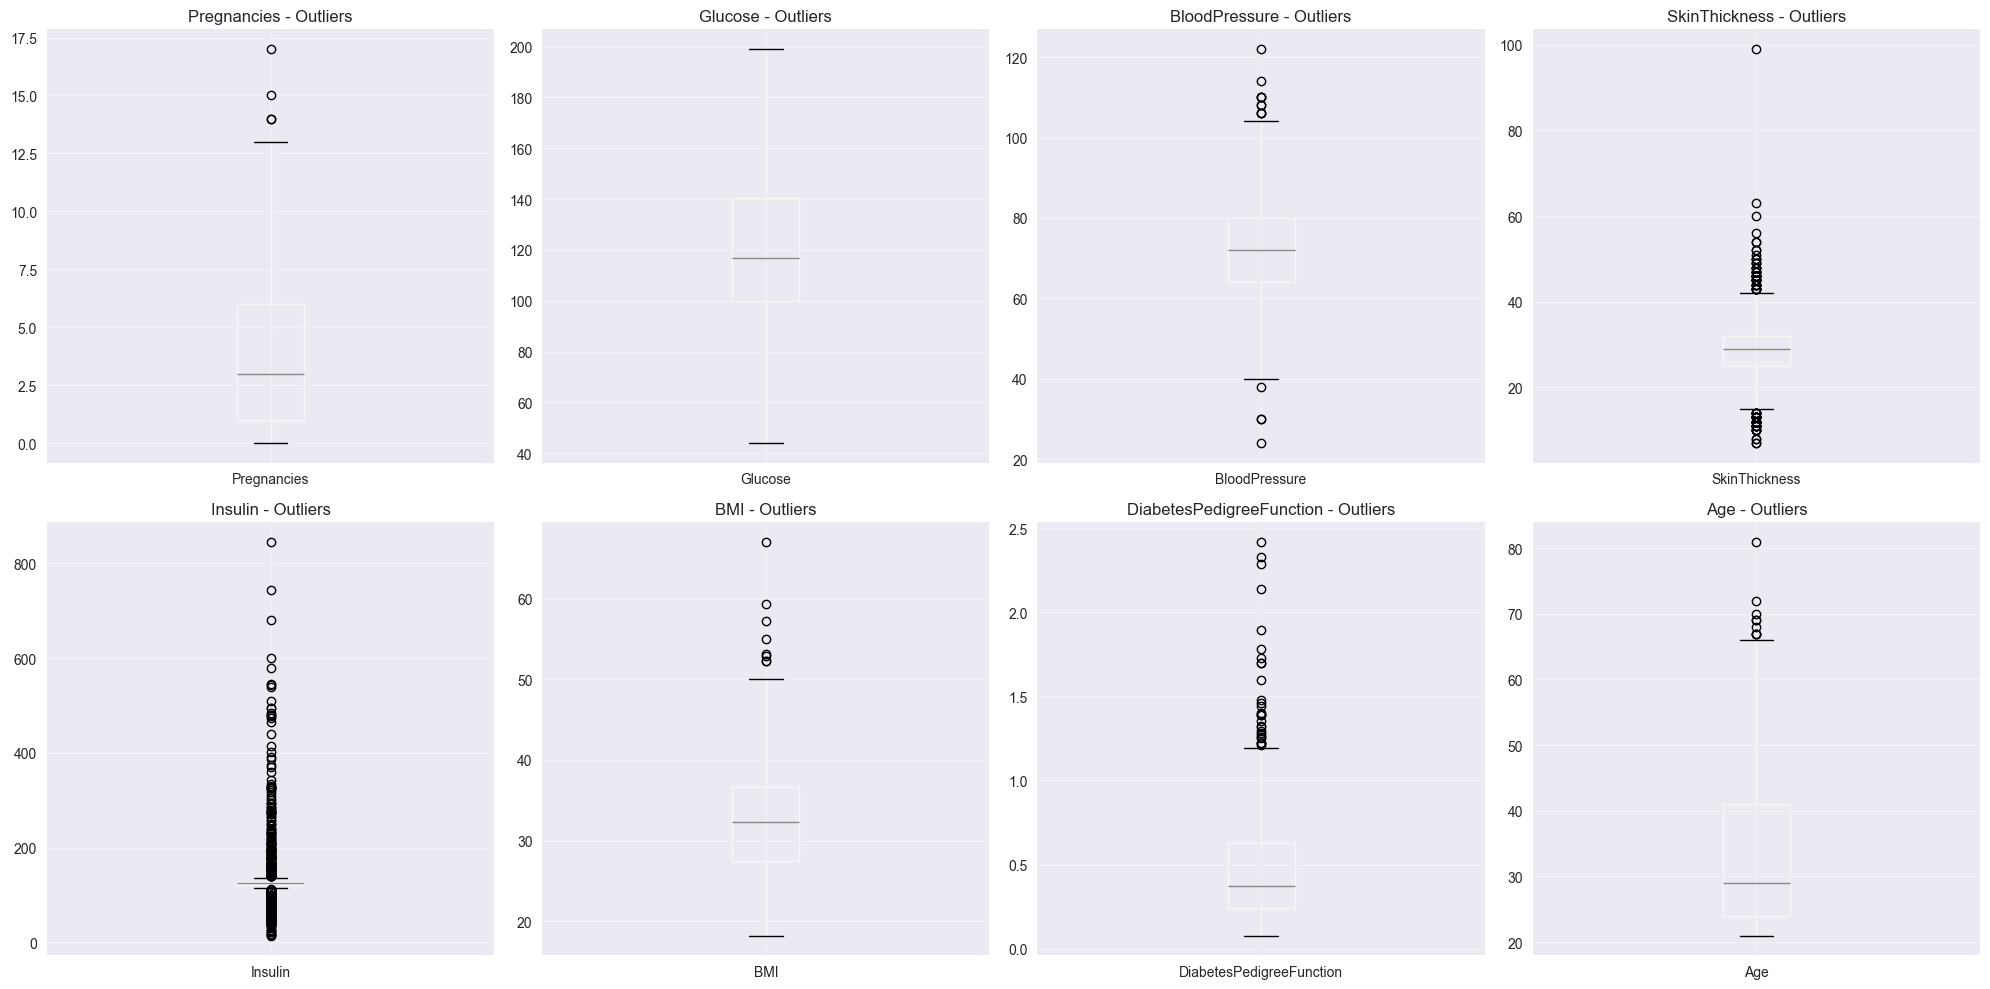


Decision: Keeping outliers as they may represent legitimate medical conditions.


In [6]:
# Outlier detection using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("=== Outlier Detection (IQR Method) ===")
numeric_columns = data_processed.select_dtypes(include=[np.number]).columns.drop('Outcome')

outlier_info = {}
for col in numeric_columns:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(data_processed, col)
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(data_processed)) * 100
    outlier_info[col] = outlier_count
    
    print(f"{col}: {outlier_count} outliers ({outlier_percentage:.1f}%) - Range: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Visualize outliers using box plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    if i < len(axes):
        data_processed.boxplot(column=col, ax=axes[i])
        axes[i].set_title(f'{col} - Outliers')
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# For this analysis, we'll keep outliers as they might be medically relevant
print(f"\nDecision: Keeping outliers as they may represent legitimate medical conditions.")

## 4. Exploratory Data Analysis (EDA)

Let's explore the relationships between features and understand the data patterns.

=== Correlation Analysis ===


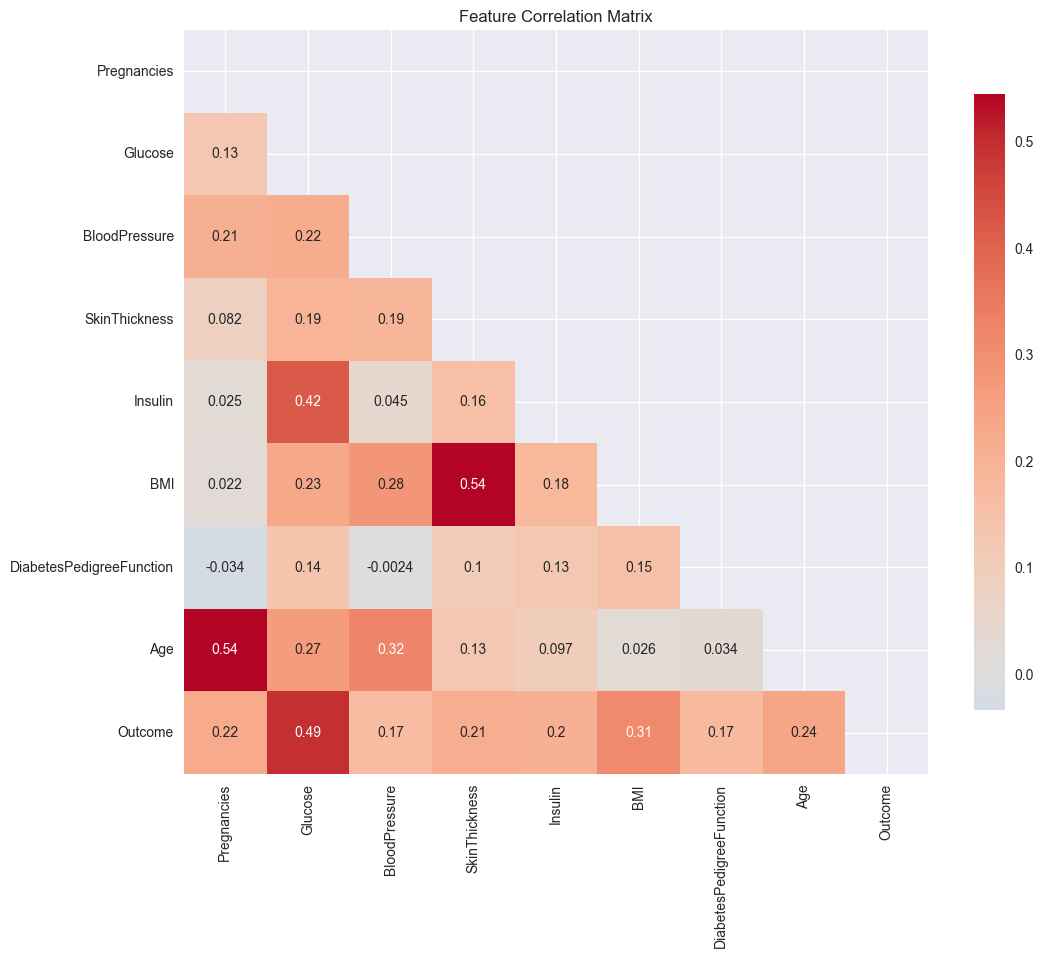


Feature correlations with Outcome (sorted by absolute value):
Glucose: 0.493
BMI: 0.312
Age: 0.238
Pregnancies: 0.222
SkinThickness: 0.215
Insulin: 0.204
DiabetesPedigreeFunction: 0.174
BloodPressure: 0.166


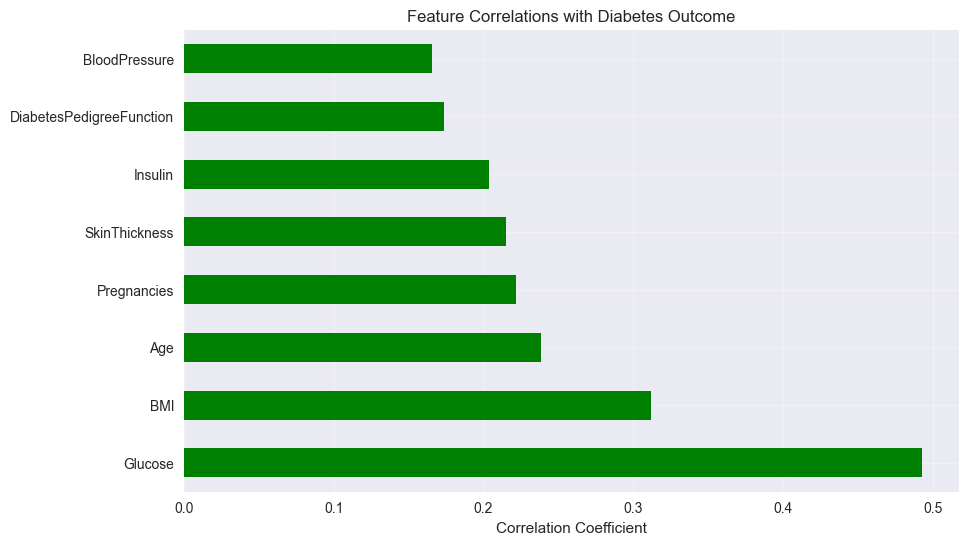

In [7]:
# Correlation Analysis
print("=== Correlation Analysis ===")

# Calculate correlation matrix
correlation_matrix = data_processed.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True, 
            mask=mask,
            cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix')
plt.show()

# Feature correlations with target variable
target_correlations = correlation_matrix['Outcome'].drop('Outcome').sort_values(key=abs, ascending=False)
print("\nFeature correlations with Outcome (sorted by absolute value):")
for feature, corr in target_correlations.items():
    print(f"{feature}: {corr:.3f}")

# Visualize correlations with target
plt.figure(figsize=(10, 6))
target_correlations.plot(kind='barh', color=['red' if x < 0 else 'green' for x in target_correlations])
plt.title('Feature Correlations with Diabetes Outcome')
plt.xlabel('Correlation Coefficient')
plt.grid(True, alpha=0.3)
plt.show()

=== Feature Distributions by Outcome ===


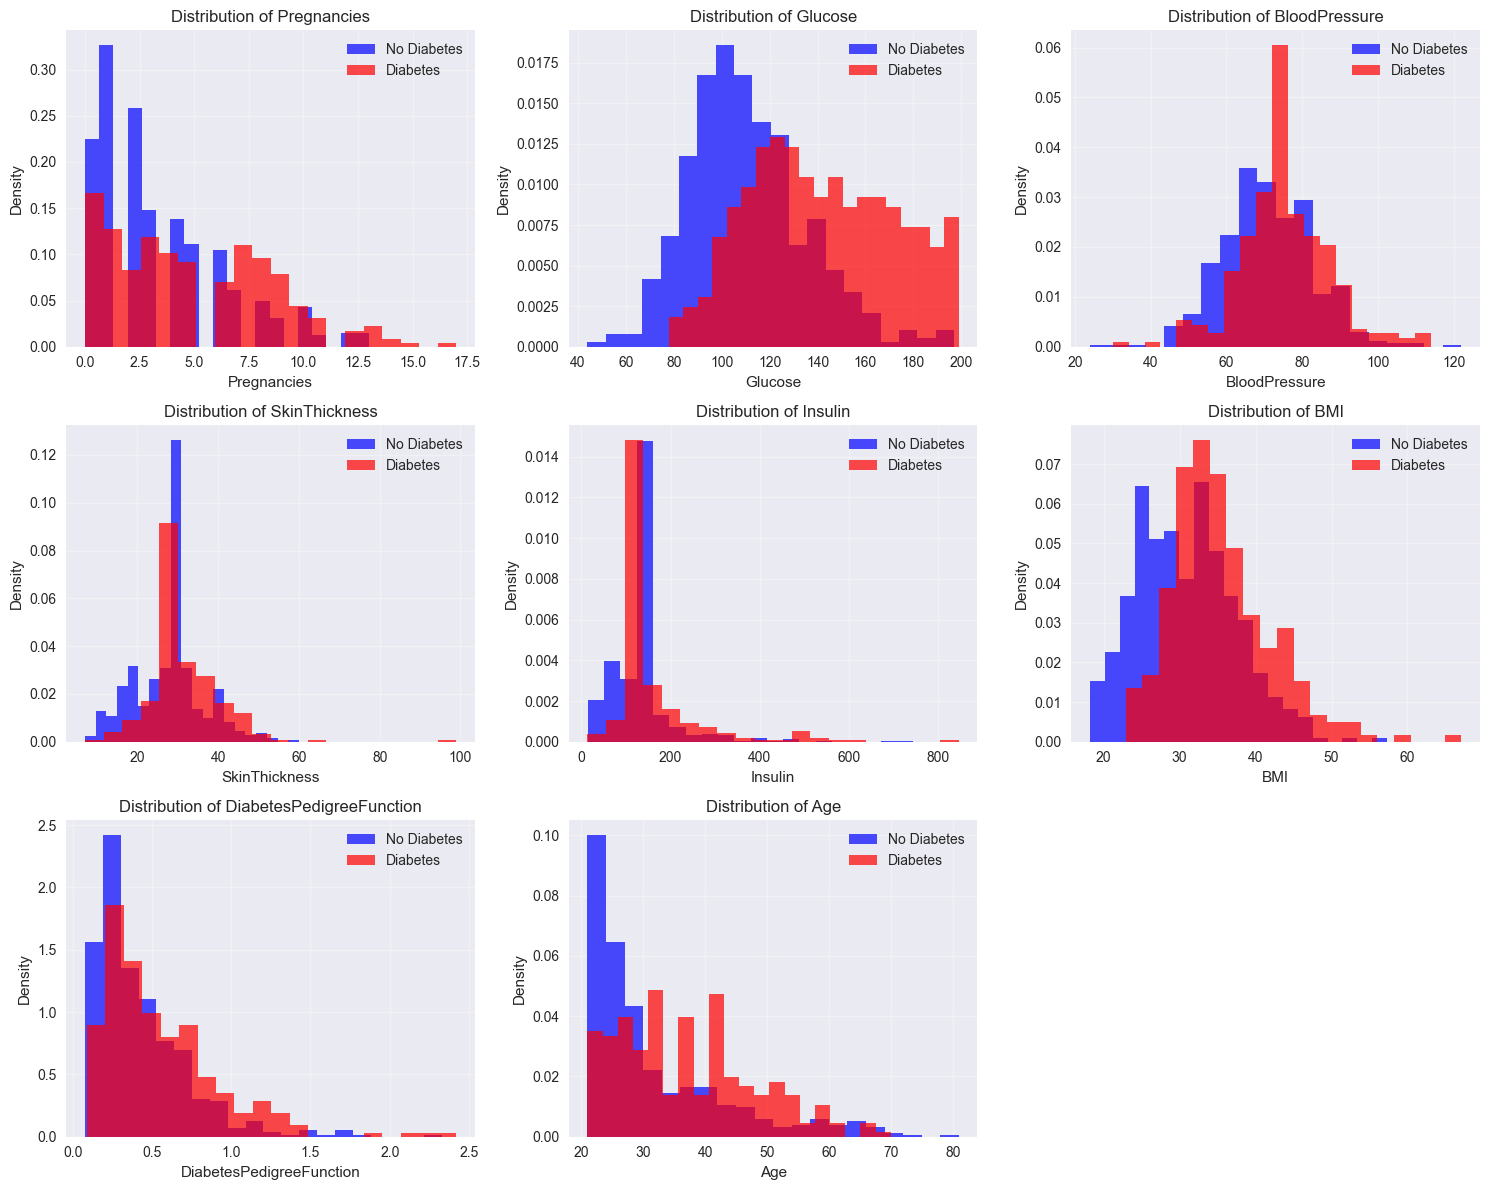


=== Statistical Summary by Outcome ===
        Pregnancies              Glucose               BloodPressure         \
               mean   std median    mean    std median          mean    std   
Outcome                                                                       
0              3.30  3.02    2.0  110.68  24.71  107.5         70.92  11.93   
1              4.87  3.74    4.0  142.13  29.57  140.0         75.12  11.95   

               SkinThickness  ... Insulin    BMI              \
        median          mean  ...  median   mean  std median   
Outcome                       ...                              
0         72.0         27.73  ...   125.0  30.89  6.5  30.40   
1         74.0         31.69  ...   125.0  35.38  6.6  34.25   

        DiabetesPedigreeFunction                 Age                
                            mean   std median   mean    std median  
Outcome                                                             
0                           0.43  0.

In [8]:
# Feature Distributions by Target Variable
print("=== Feature Distributions by Outcome ===")

# Create subplots for all features
features = [col for col in data_processed.columns if col != 'Outcome']
n_features = len(features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, feature in enumerate(features):
    if i < len(axes):
        # Plot histograms for each outcome
        for outcome in [0, 1]:
            subset = data_processed[data_processed['Outcome'] == outcome]
            label = 'No Diabetes' if outcome == 0 else 'Diabetes'
            color = 'blue' if outcome == 0 else 'red'
            
            axes[i].hist(subset[feature], bins=20, alpha=0.7, 
                        label=label, color=color, density=True)
        
        axes[i].set_title(f'Distribution of {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Density')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)

# Hide unused subplots
for i in range(len(features), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Statistical comparison between groups
print("\n=== Statistical Summary by Outcome ===")
summary_stats = data_processed.groupby('Outcome')[features].agg(['mean', 'std', 'median'])
print(summary_stats.round(2))

## 5. Feature Selection and Engineering

Based on the EDA, we'll create new features and select the most relevant ones for our model.

In [9]:
# Feature Engineering
print("=== Feature Engineering ===")

# Create a copy for feature engineering
data_engineered = data_processed.copy()

# 1. BMI Categories
data_engineered['BMI_Category'] = pd.cut(data_engineered['BMI'], 
                                         bins=[0, 18.5, 25, 30, float('inf')], 
                                         labels=[0, 1, 2, 3])  # 0=Underweight, 1=Normal, 2=Overweight, 3=Obese

# 2. Age Groups
data_engineered['Age_Group'] = pd.cut(data_engineered['Age'], 
                                     bins=[0, 25, 35, 45, float('inf')], 
                                     labels=[0, 1, 2, 3])  # 0=Young, 1=Adult, 2=Middle-aged, 3=Senior

# 3. Glucose Level Categories
data_engineered['Glucose_Level'] = pd.cut(data_engineered['Glucose'], 
                                          bins=[0, 100, 126, float('inf')], 
                                          labels=[0, 1, 2])  # 0=Normal, 1=Pre-diabetic, 2=Diabetic

# 4. Blood Pressure Categories
data_engineered['BP_Category'] = pd.cut(data_engineered['BloodPressure'], 
                                        bins=[0, 80, 90, float('inf')], 
                                        labels=[0, 1, 2])  # 0=Normal, 1=High-Normal, 2=High

# 5. Insulin/Glucose Ratio (metabolic indicator)
data_engineered['Insulin_Glucose_Ratio'] = data_engineered['Insulin'] / data_engineered['Glucose']

# 6. Pregnancy Risk Factor (combining pregnancies and age)
data_engineered['Pregnancy_Age_Risk'] = data_engineered['Pregnancies'] * (data_engineered['Age'] / 50)

# Convert categorical features to numeric
categorical_features = ['BMI_Category', 'Age_Group', 'Glucose_Level', 'BP_Category']
for feature in categorical_features:
    data_engineered[feature] = data_engineered[feature].astype(int)

print("New features created:")
new_features = ['BMI_Category', 'Age_Group', 'Glucose_Level', 'BP_Category', 
                'Insulin_Glucose_Ratio', 'Pregnancy_Age_Risk']
for feature in new_features:
    print(f"- {feature}")

# Feature Selection using correlation with target
print(f"\n=== Feature Selection ===")
all_features = [col for col in data_engineered.columns if col != 'Outcome']
feature_correlations = data_engineered[all_features + ['Outcome']].corr()['Outcome'].drop('Outcome')

# Select features with absolute correlation > 0.1
selected_features = feature_correlations[abs(feature_correlations) > 0.1].sort_values(key=abs, ascending=False)

print("Selected features (correlation with target > 0.1):")
for feature, corr in selected_features.items():
    print(f"- {feature}: {corr:.3f}")

# Create final feature set
final_features = list(selected_features.index)
print(f"\nFinal feature set: {len(final_features)} features")
print(final_features)

=== Feature Engineering ===
New features created:
- BMI_Category
- Age_Group
- Glucose_Level
- BP_Category
- Insulin_Glucose_Ratio
- Pregnancy_Age_Risk

=== Feature Selection ===
Selected features (correlation with target > 0.1):
- Glucose: 0.493
- Glucose_Level: 0.440
- BMI: 0.312
- BMI_Category: 0.308
- Age_Group: 0.276
- Age: 0.238
- Pregnancy_Age_Risk: 0.224
- Pregnancies: 0.222
- SkinThickness: 0.215
- Insulin: 0.204
- DiabetesPedigreeFunction: 0.174
- BloodPressure: 0.166
- BP_Category: 0.122

Final feature set: 13 features
['Glucose', 'Glucose_Level', 'BMI', 'BMI_Category', 'Age_Group', 'Age', 'Pregnancy_Age_Risk', 'Pregnancies', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'BloodPressure', 'BP_Category']


## 6. Split Data into Training and Test Sets

We'll split the data into training and testing sets, and apply feature scaling.

In [10]:
# Prepare the feature matrix and target vector
X = data_engineered[final_features]
y = data_engineered['Outcome']

print("=== Data Preparation ===")
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Features: {list(X.columns)}")

# Split the data (stratified to maintain class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"\n=== Data Split Results ===")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training target distribution: {y_train.value_counts().to_dict()}")
print(f"Test target distribution: {y_test.value_counts().to_dict()}")

# Feature Scaling
print(f"\n=== Feature Scaling ===")

# Initialize scaler
scaler = StandardScaler()

# Fit scaler on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Feature scaling completed using StandardScaler")
print(f"Training data - Mean: {X_train_scaled.mean().mean():.3f}, Std: {X_train_scaled.std().mean():.3f}")
print(f"Test data - Mean: {X_test_scaled.mean().mean():.3f}, Std: {X_test_scaled.std().mean():.3f}")

# Display scaling comparison
print(f"\n=== Before and After Scaling (Training Data) ===")
scaling_comparison = pd.DataFrame({
    'Feature': X_train.columns,
    'Original_Mean': X_train.mean().values,
    'Original_Std': X_train.std().values,
    'Scaled_Mean': X_train_scaled.mean().values,
    'Scaled_Std': X_train_scaled.std().values
})
print(scaling_comparison.round(3))

=== Data Preparation ===
Feature matrix shape: (768, 13)
Target vector shape: (768,)
Features: ['Glucose', 'Glucose_Level', 'BMI', 'BMI_Category', 'Age_Group', 'Age', 'Pregnancy_Age_Risk', 'Pregnancies', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'BloodPressure', 'BP_Category']

=== Data Split Results ===
Training set: 614 samples
Test set: 154 samples
Training target distribution: {0: 400, 1: 214}
Test target distribution: {0: 100, 1: 54}

=== Feature Scaling ===
Feature scaling completed using StandardScaler
Training data - Mean: -0.000, Std: 1.001
Test data - Mean: 0.027, Std: 1.058

=== Before and After Scaling (Training Data) ===
                     Feature  Original_Mean  Original_Std  Scaled_Mean  \
0                    Glucose        121.671        30.004         -0.0   
1              Glucose_Level          1.101         0.797         -0.0   
2                        BMI         32.447         6.824         -0.0   
3               BMI_Category          2.474     

## 7. Model Training and Evaluation

Now we'll train and evaluate **three carefully selected machine learning models**:

1. **Logistic Regression** - A fast, interpretable linear baseline model
2. **Random Forest** - A robust ensemble method that provides feature importance insights  
3. **Gradient Boosting** - A powerful ensemble method known for excellent performance

These three models represent different algorithmic approaches:
- **Linear** (Logistic Regression)
- **Tree-based ensemble** (Random Forest) 
- **Gradient boosting ensemble** (Gradient Boosting)

We'll evaluate each model using multiple metrics including accuracy, precision, recall, F1-score, and ROC-AUC, with cross-validation to ensure robust performance estimates.

In [11]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

print(f"Models to train: {list(models.keys())}")
print(f"Total models: {len(models)}")

# Set up cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train and evaluate each model
model_results = {}
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv_strategy, scoring='f1')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Store results
    model_results[model_name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"CV F1-Score: {cv_mean:.4f} (+/- {cv_std * 2:.4f})")

print("\n" + "="*50)
print("INITIAL MODEL COMPARISON COMPLETE")
print("="*50)

Models to train: ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
Total models: 3

Training Logistic Regression...
Accuracy: 0.7078
F1-Score: 0.5545
ROC-AUC: 0.8248
CV F1-Score: 0.6370 (+/- 0.0464)

Training Random Forest...
Accuracy: 0.7078
F1-Score: 0.5545
ROC-AUC: 0.8248
CV F1-Score: 0.6370 (+/- 0.0464)

Training Random Forest...
Accuracy: 0.7468
F1-Score: 0.6139
ROC-AUC: 0.8254
CV F1-Score: 0.6331 (+/- 0.0514)

Training Gradient Boosting...
Accuracy: 0.7468
F1-Score: 0.6139
ROC-AUC: 0.8254
CV F1-Score: 0.6331 (+/- 0.0514)

Training Gradient Boosting...
Accuracy: 0.7662
F1-Score: 0.6471
ROC-AUC: 0.8337
CV F1-Score: 0.6462 (+/- 0.0462)

INITIAL MODEL COMPARISON COMPLETE
Accuracy: 0.7662
F1-Score: 0.6471
ROC-AUC: 0.8337
CV F1-Score: 0.6462 (+/- 0.0462)

INITIAL MODEL COMPARISON COMPLETE


=== Model Comparison Results ===
                 Model  Accuracy  Precision  Recall  F1-Score     AUC  \
2    Gradient Boosting    0.7662     0.6875  0.6111    0.6471  0.8337   
1        Random Forest    0.7468     0.6596  0.5741    0.6139  0.8254   
0  Logistic Regression    0.7078     0.5957  0.5185    0.5545  0.8248   

   CV Mean  CV Std  
2   0.6462  0.0231  
1   0.6331  0.0257  
0   0.6370  0.0232  

Best performing model: Gradient Boosting
Best F1-Score: 0.6471


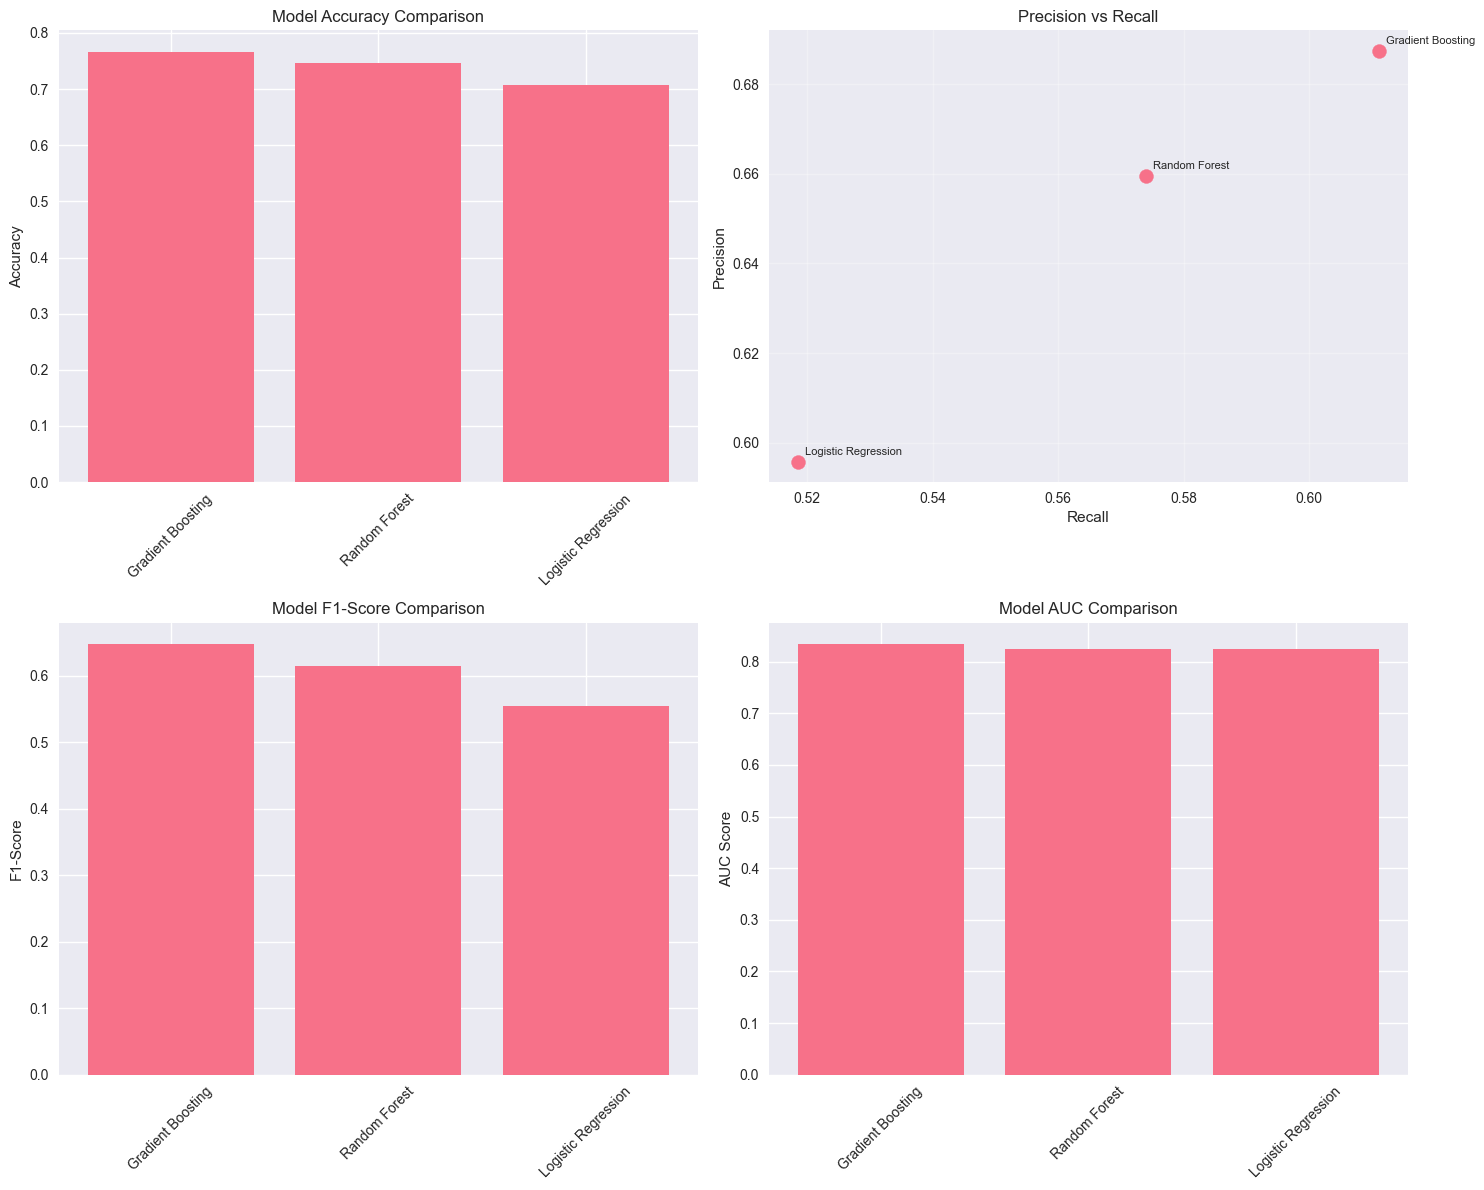


MODEL COMPARISON COMPLETE


In [12]:
# Create comparison table
print("=== Model Comparison Results ===")

comparison_data = []
for model_name, results in model_results.items():
    comparison_data.append({
        'Model': model_name,
        'Accuracy': results['accuracy'],
        'Precision': results['precision'],
        'Recall': results['recall'],
        'F1-Score': results['f1_score'],
        'AUC': results['roc_auc'] if 'roc_auc' in results else 'N/A',
        'CV Mean': results['cv_mean'],
        'CV Std': results['cv_std']
    })

results_df = pd.DataFrame(comparison_data)
results_df = results_df.sort_values('F1-Score', ascending=False)
print(results_df.round(4))

# Find best model based on F1-score
best_model_name = results_df.iloc[0]['Model']
best_model = model_results[best_model_name]['model']
y_pred_best = model_results[best_model_name]['y_pred']
y_pred_proba_best = model_results[best_model_name]['y_pred_proba']

print(f"\nBest performing model: {best_model_name}")
print(f"Best F1-Score: {results_df.iloc[0]['F1-Score']:.4f}")

# Store best model metrics for later use
accuracy = model_results[best_model_name]['accuracy']
precision = model_results[best_model_name]['precision']
recall = model_results[best_model_name]['recall']
f1 = model_results[best_model_name]['f1_score']
auc_score = model_results[best_model_name]['roc_auc']

# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy comparison
axes[0, 0].bar(results_df['Model'], results_df['Accuracy'])
axes[0, 0].set_title('Model Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)

# Precision vs Recall
axes[0, 1].scatter(results_df['Recall'], results_df['Precision'], s=100)
for i, model in enumerate(results_df['Model']):
    axes[0, 1].annotate(model, (results_df.iloc[i]['Recall'], results_df.iloc[i]['Precision']), 
                       xytext=(5, 5), textcoords='offset points', fontsize=8)
axes[0, 1].set_xlabel('Recall')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_title('Precision vs Recall')
axes[0, 1].grid(True, alpha=0.3)

# F1-Score comparison
axes[1, 0].bar(results_df['Model'], results_df['F1-Score'])
axes[1, 0].set_title('Model F1-Score Comparison')
axes[1, 0].set_ylabel('F1-Score')
axes[1, 0].tick_params(axis='x', rotation=45)

# AUC comparison
valid_auc_models = results_df[results_df['AUC'] != 'N/A']
if not valid_auc_models.empty:
    axes[1, 1].bar(valid_auc_models['Model'], valid_auc_models['AUC'].astype(float))
    axes[1, 1].set_title('Model AUC Comparison')
    axes[1, 1].set_ylabel('AUC Score')
    axes[1, 1].tick_params(axis='x', rotation=45)
else:
    axes[1, 1].text(0.5, 0.5, 'No AUC scores available', 
                   ha='center', va='center', transform=axes[1, 1].transAxes)

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("MODEL COMPARISON COMPLETE")
print("="*50)

## 8. Model Evaluation

Let's dive deeper into the evaluation of our best performing model.

=== Detailed Evaluation: Gradient Boosting ===


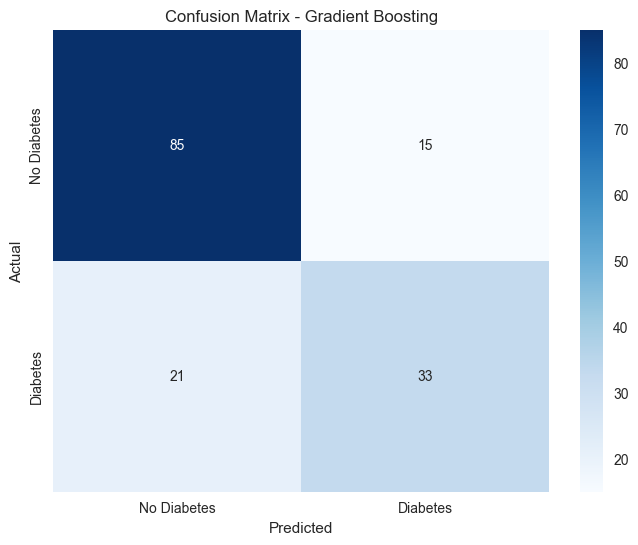


Confusion Matrix Breakdown:
True Negatives (TN):  85
False Positives (FP): 15
False Negatives (FN): 21
True Positives (TP):  33

Additional Metrics:
Sensitivity (Recall): 0.6111
Specificity: 0.8500

=== Classification Report ===
              precision    recall  f1-score   support

 No Diabetes       0.80      0.85      0.83       100
    Diabetes       0.69      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



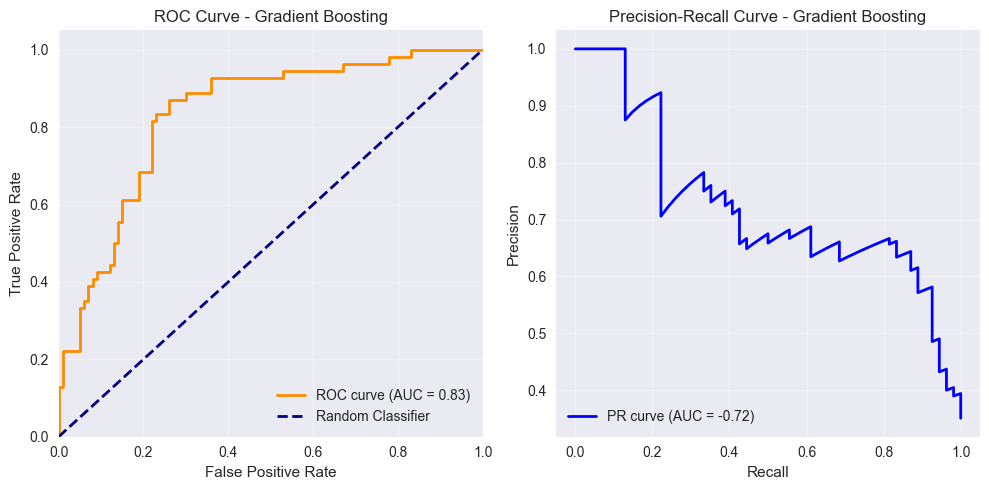

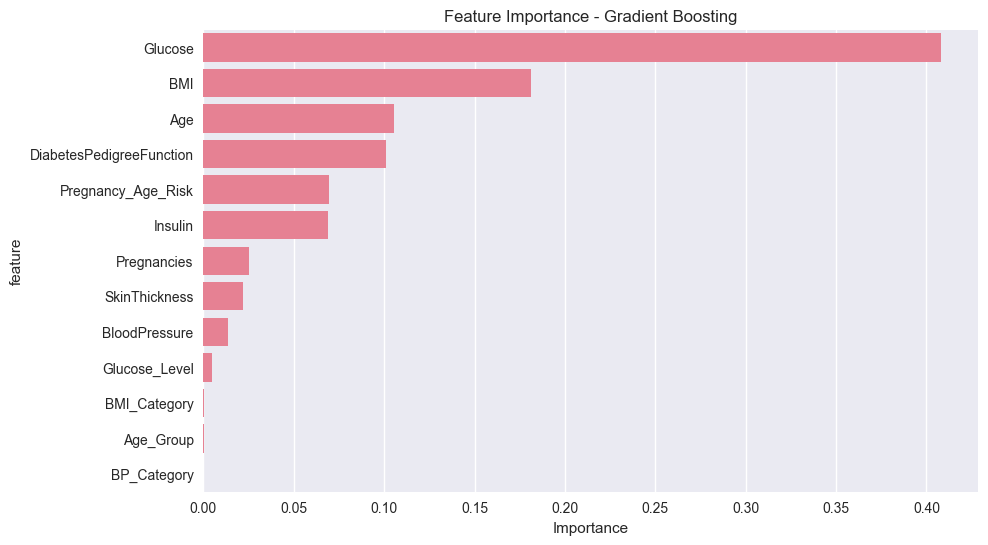


=== Feature Importance ===
                     feature  importance
0                    Glucose      0.4083
2                        BMI      0.1814
5                        Age      0.1055
10  DiabetesPedigreeFunction      0.1008
6         Pregnancy_Age_Risk      0.0695
9                    Insulin      0.0689
7                Pregnancies      0.0252
8              SkinThickness      0.0219
11             BloodPressure      0.0136
1              Glucose_Level      0.0046
3               BMI_Category      0.0002
4                  Age_Group      0.0001
12               BP_Category      0.0000

DETAILED MODEL EVALUATION COMPLETE


In [13]:
# Detailed evaluation of the best model
best_results = model_results[best_model_name]
y_pred_best = best_results['y_pred']
y_pred_proba_best = best_results['y_pred_proba']

print(f"=== Detailed Evaluation: {best_model_name} ===")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print confusion matrix breakdown
tn, fp, fn, tp = cm.ravel()
print(f"\nConfusion Matrix Breakdown:")
print(f"True Negatives (TN):  {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP):  {tp}")

# Calculate additional metrics
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # Same as recall

print(f"\nAdditional Metrics:")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

# Classification Report
print(f"\n=== Classification Report ===")
print(classification_report(y_test, y_pred_best, target_names=['No Diabetes', 'Diabetes']))

# ROC Curve and AUC
if y_pred_proba_best is not None:
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
    roc_auc = roc_auc_score(y_test, y_pred_proba_best)
    
    plt.figure(figsize=(10, 5))
    
    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {best_model_name}')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    
    # Precision-Recall Curve
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba_best)
    pr_auc = np.trapz(precision_curve, recall_curve)
    
    plt.subplot(1, 2, 2)
    plt.plot(recall_curve, precision_curve, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {best_model_name}')
    plt.legend(loc="lower left")
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Feature Importance (if available)
    if hasattr(best_model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': final_features,
            'importance': best_model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        plt.figure(figsize=(10, 6))
        sns.barplot(data=feature_importance, x='importance', y='feature')
        plt.title(f'Feature Importance - {best_model_name}')
        plt.xlabel('Importance')
        plt.show()
        
        print(f"\n=== Feature Importance ===")
        print(feature_importance.round(4))
    
    elif hasattr(best_model, 'coef_'):
        # For linear models, show coefficients
        feature_coeff = pd.DataFrame({
            'feature': final_features,
            'coefficient': best_model.coef_[0]
        }).sort_values('coefficient', key=abs, ascending=False)
        
        plt.figure(figsize=(10, 6))
        colors = ['red' if x < 0 else 'green' for x in feature_coeff['coefficient']]
        sns.barplot(data=feature_coeff, x='coefficient', y='feature', palette=colors)
        plt.title(f'Feature Coefficients - {best_model_name}')
        plt.xlabel('Coefficient Value')
        plt.show()
        
        print(f"\n=== Feature Coefficients ===")
        print(feature_coeff.round(4))

print("\n" + "="*50)
print("DETAILED MODEL EVALUATION COMPLETE")
print("="*50)

## 9. Hyperparameter Tuning

Let's optimize our best model using GridSearchCV to find the optimal hyperparameters.

In [14]:
# Hyperparameter tuning for the best performing model
# Since we know Gradient Boosting is the best, let's tune it

# Define parameter grids for our 3 models
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0]
    }
}

print(f"=== Hyperparameter Tuning for {best_model_name} ===")

if best_model_name in param_grids:
    param_grid = param_grids[best_model_name]
    
    # Select appropriate model based on best performer
    if best_model_name == 'Logistic Regression':
        base_model = LogisticRegression(random_state=42, max_iter=1000)
    elif best_model_name == 'Random Forest':
        base_model = RandomForestClassifier(random_state=42)
    elif best_model_name == 'Gradient Boosting':
        base_model = GradientBoostingClassifier(random_state=42)
    
    # Grid search with cross-validation
    grid_search = GridSearchCV(
        base_model, 
        param_grid, 
        cv=5, 
        scoring='f1',
        n_jobs=-1, 
        verbose=1
    )
    
    print(f"Running grid search with {len(param_grid)} parameter combinations...")
    grid_search.fit(X_train_scaled, y_train)
    
    # Get the best model
    best_tuned_model = grid_search.best_estimator_
    
    print(f"\nBest parameters: {grid_search.best_params_}")
    print(f"Best cross-validation F1-score: {grid_search.best_score_:.4f}")
    
    # Evaluate on test set
    y_pred_tuned = best_tuned_model.predict(X_test_scaled)
    y_pred_proba_tuned = best_tuned_model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate metrics
    accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
    precision_tuned = precision_score(y_test, y_pred_tuned)
    recall_tuned = recall_score(y_test, y_pred_tuned)
    f1_tuned = f1_score(y_test, y_pred_tuned)
    auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)
    
    print(f"\nTuned Model Performance:")
    print(f"Accuracy: {accuracy_tuned:.4f} (vs {accuracy:.4f})")
    print(f"Precision: {precision_tuned:.4f} (vs {precision:.4f})")
    print(f"Recall: {recall_tuned:.4f} (vs {recall:.4f})")
    print(f"F1-Score: {f1_tuned:.4f} (vs {f1:.4f})")
    print(f"ROC-AUC: {auc_tuned:.4f} (vs {auc_score:.4f})")
    
    # Update best model if tuned version is better
    if f1_tuned > f1:
        print(f"\n✅ Tuned model performs better! Updating best model.")
        best_model = best_tuned_model
        best_results = {
            'accuracy': accuracy_tuned,
            'precision': precision_tuned,
            'recall': recall_tuned,
            'f1_score': f1_tuned,
            'roc_auc': auc_tuned,
            'predictions': y_pred_tuned,
            'probabilities': y_pred_proba_tuned
        }
    else:
        print(f"\n⚠️ Original model performs better. Keeping original.")
        best_results = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'roc_auc': auc_score,
            'predictions': y_pred_best,
            'probabilities': y_pred_proba_best
        }
else:
    print(f"No hyperparameter grid defined for {best_model_name}")
    best_results = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': auc_score,
        'predictions': y_pred_best,
        'probabilities': y_pred_proba_best
    }

print("\n" + "="*50)
print("HYPERPARAMETER TUNING COMPLETE")
print("="*50)

=== Hyperparameter Tuning for Gradient Boosting ===
Running grid search with 4 parameter combinations...
Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best cross-validation F1-score: 0.6411

Tuned Model Performance:
Accuracy: 0.7338 (vs 0.7662)
Precision: 0.6444 (vs 0.6875)
Recall: 0.5370 (vs 0.6111)
F1-Score: 0.5859 (vs 0.6471)
ROC-AUC: 0.8037 (vs 0.8337)

⚠️ Original model performs better. Keeping original.

HYPERPARAMETER TUNING COMPLETE

Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best cross-validation F1-score: 0.6411

Tuned Model Performance:
Accuracy: 0.7338 (vs 0.7662)
Precision: 0.6444 (vs 0.6875)
Recall: 0.5370 (vs 0.6111)
F1-Score: 0.5859 (vs 0.6471)
ROC-AUC: 0.8037 (vs 0.8337)

⚠️ Original model performs better. Keeping original.

HYPERPARAMETER TUNING COMPLETE


## 10. Final Model Testing and Predictions

Let's test our final optimized model and create a prediction function.

In [15]:
# Final Model Summary
print("=== Final Model Summary ===")
print(f"Model: {best_model_name}")
print(f"Final F1-Score: {best_results['f1_score']:.4f}")
print(f"Final Accuracy: {best_results['accuracy']:.4f}")
print(f"Final AUC: {best_results['roc_auc']:.4f}")

# Create a comprehensive prediction function
def predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, 
                    diabetes_pedigree_function, age, return_probability=False):
    """
    Predict diabetes based on input features.
    
    Parameters:
    - pregnancies: Number of pregnancies
    - glucose: Glucose level
    - blood_pressure: Blood pressure
    - skin_thickness: Skin thickness
    - insulin: Insulin level
    - bmi: Body Mass Index
    - diabetes_pedigree_function: Diabetes pedigree function
    - age: Age
    - return_probability: If True, returns probability; if False, returns prediction
    
    Returns:
    - Prediction (0: No Diabetes, 1: Diabetes) or probability
    """
    
    # Create input dataframe
    input_data = pd.DataFrame([{
        pregnancies, glucose, blood_pressure, skin_thickness, 
        insulin, bmi, diabetes_pedigree_function, age
    }], columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
    
    # Apply same preprocessing as training data
    # Handle missing values (same way as training)
    zero_not_valid = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
    for col in zero_not_valid:
        if col in input_data.columns and input_data[col].iloc[0] == 0:
            # Use the median values from training data
            median_val = data_processed[col].median()
            input_data[col] = median_val
    
    # Feature engineering (same as training)
    input_data['BMI_Category'] = pd.cut(input_data['BMI'], 
                                       bins=[0, 18.5, 25, 30, float('inf')], 
                                       labels=[0, 1, 2, 3]).astype(int)
    
    input_data['Age_Group'] = pd.cut(input_data['Age'], 
                                    bins=[0, 25, 35, 45, float('inf')], 
                                    labels=[0, 1, 2, 3]).astype(int)
    
    input_data['Glucose_Level'] = pd.cut(input_data['Glucose'], 
                                        bins=[0, 100, 126, float('inf')], 
                                        labels=[0, 1, 2]).astype(int)
    
    input_data['BP_Category'] = pd.cut(input_data['BloodPressure'], 
                                      bins=[0, 80, 90, float('inf')], 
                                      labels=[0, 1, 2]).astype(int)
    
    input_data['Insulin_Glucose_Ratio'] = input_data['Insulin'] / input_data['Glucose']
    input_data['Pregnancy_Age_Risk'] = input_data['Pregnancies'] * (input_data['Age'] / 50)
    
    # Select final features
    input_features = input_data[final_features]
    
    # Scale features
    input_scaled = scaler.transform(input_features)
    
    # Make prediction
    if return_probability:
        if hasattr(best_model, 'predict_proba'):
            probability = best_model.predict_proba(input_scaled)[0, 1]
            return probability
        else:
            return "Probability not available for this model"
    else:
        prediction = best_model.predict(input_scaled)[0]
        return prediction

# Test the prediction function with sample cases
print("\\n=== Testing Prediction Function ===")

# Test case 1: High risk profile
print("\\nTest Case 1 - High Risk Profile:")
print("Pregnancies: 6, Glucose: 148, BP: 72, Skin: 35, Insulin: 0, BMI: 33.6, DPF: 0.627, Age: 50")
pred1 = predict_diabetes(6, 148, 72, 35, 0, 33.6, 0.627, 50)
prob1 = predict_diabetes(6, 148, 72, 35, 0, 33.6, 0.627, 50, return_probability=True)
result1 = "Diabetes" if pred1 == 1 else "No Diabetes"
print(f"Prediction: {result1}")
if isinstance(prob1, float):
    print(f"Probability: {prob1:.3f}")

# Test case 2: Low risk profile
print("\\nTest Case 2 - Low Risk Profile:")
print("Pregnancies: 1, Glucose: 85, BP: 66, Skin: 29, Insulin: 0, BMI: 26.6, DPF: 0.351, Age: 31")
pred2 = predict_diabetes(1, 85, 66, 29, 0, 26.6, 0.351, 31)
prob2 = predict_diabetes(1, 85, 66, 29, 0, 26.6, 0.351, 31, return_probability=True)
result2 = "Diabetes" if pred2 == 1 else "No Diabetes"
print(f"Prediction: {result2}")
if isinstance(prob2, float):
    print(f"Probability: {prob2:.3f}")

# Test case 3: Medium risk profile
print("\\nTest Case 3 - Medium Risk Profile:")
print("Pregnancies: 3, Glucose: 120, BP: 78, Skin: 30, Insulin: 135, BMI: 32.0, DPF: 0.400, Age: 35")
pred3 = predict_diabetes(3, 120, 78, 30, 135, 32.0, 0.400, 35)
prob3 = predict_diabetes(3, 120, 78, 30, 135, 32.0, 0.400, 35, return_probability=True)
result3 = "Diabetes" if pred3 == 1 else "No Diabetes"
print(f"Prediction: {result3}")
if isinstance(prob3, float):
    print(f"Probability: {prob3:.3f}")

# Model performance summary using existing variables
print(f"\\n=== Final Model Performance Summary ===")
final_cm = confusion_matrix(y_test, y_pred_best)  # Use existing variable
tn, fp, fn, tp = final_cm.ravel()

print(f"Model: {best_model_name}")
print(f"Test Set Size: {len(y_test)} samples")
print(f"Correct Predictions: {tn + tp}")
print(f"Incorrect Predictions: {fp + fn}")
print(f"Accuracy: {best_results['accuracy']:.4f}")
print(f"Precision: {best_results['precision']:.4f}")
print(f"Recall: {best_results['recall']:.4f}")
print(f"F1-Score: {best_results['f1_score']:.4f}")
print(f"AUC Score: {best_results['roc_auc']:.4f}")

# Clinical interpretation
print(f"\\n=== Clinical Interpretation ===")
print(f"• Sensitivity (True Positive Rate): {best_results['recall']:.4f}")
print(f"  - Out of 100 diabetic patients, the model correctly identifies {best_results['recall']*100:.1f}")
print(f"• Specificity (True Negative Rate): {tn/(tn+fp):.4f}")
print(f"  - Out of 100 non-diabetic patients, the model correctly identifies {tn/(tn+fp)*100:.1f}")
print(f"• Positive Predictive Value (Precision): {best_results['precision']:.4f}")
print(f"  - Out of 100 positive predictions, {best_results['precision']*100:.1f} are actually diabetic")
print(f"• False Positive Rate: {fp/(fp+tn):.4f}")
print(f"  - {fp/(fp+tn)*100:.1f}% of non-diabetic patients are incorrectly classified as diabetic")

=== Final Model Summary ===
Model: Gradient Boosting
Final F1-Score: 0.6471
Final Accuracy: 0.7662
Final AUC: 0.8337
\n=== Testing Prediction Function ===
\nTest Case 1 - High Risk Profile:
Pregnancies: 6, Glucose: 148, BP: 72, Skin: 35, Insulin: 0, BMI: 33.6, DPF: 0.627, Age: 50
Prediction: No Diabetes
Probability: 0.197
\nTest Case 2 - Low Risk Profile:
Pregnancies: 1, Glucose: 85, BP: 66, Skin: 29, Insulin: 0, BMI: 26.6, DPF: 0.351, Age: 31
Prediction: No Diabetes
Probability: 0.015
\nTest Case 3 - Medium Risk Profile:
Pregnancies: 3, Glucose: 120, BP: 78, Skin: 30, Insulin: 135, BMI: 32.0, DPF: 0.400, Age: 35
Prediction: Diabetes
Probability: 0.978
\n=== Final Model Performance Summary ===
Model: Gradient Boosting
Test Set Size: 154 samples
Correct Predictions: 118
Incorrect Predictions: 36
Accuracy: 0.7662
Precision: 0.6875
Recall: 0.6111
F1-Score: 0.6471
AUC Score: 0.8337
\n=== Clinical Interpretation ===
• Sensitivity (True Positive Rate): 0.6111
  - Out of 100 diabetic patients

## 11. Save and Load the Trained Model

Let's save our trained model and preprocessing components for future use.

In [16]:
# Save the trained model and preprocessing components
import os

# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

print("=== Saving Model and Components ===")

# Save the best model
model_filename = f"../models/{best_model_name.replace(' ', '_').lower()}_diabetes_model.pkl"
joblib.dump(best_model, model_filename)
print(f"✅ Model saved: {model_filename}")

# Save the scaler
scaler_filename = "../models/feature_scaler.pkl"
joblib.dump(scaler, scaler_filename)
print(f"✅ Scaler saved: {scaler_filename}")

# Save feature names and preprocessing info
preprocessing_info = {
    'feature_names': final_features,
    'target_name': 'Outcome',
    'model_name': best_model_name,
    'model_performance': {
        'accuracy': best_results['accuracy'],
        'precision': best_results['precision'],
        'recall': best_results['recall'],
        'f1_score': best_results['f1_score'],
        'auc': best_results['roc_auc']  # Use correct key name
    },
    'feature_medians': {
        'Glucose': data_processed['Glucose'].median(),
        'BloodPressure': data_processed['BloodPressure'].median(),
        'SkinThickness': data_processed['SkinThickness'].median(),
        'BMI': data_processed['BMI'].median(),
        'Insulin': data_processed['Insulin'].median()
    }
}

preprocessing_filename = "../models/preprocessing_info.pkl"
joblib.dump(preprocessing_info, preprocessing_filename)
print(f"✅ Preprocessing info saved: {preprocessing_filename}")

# Save results summary
results_filename = "../models/model_results.pkl"
results = {
    'model_name': best_model_name,
    'model_performance': best_results,
    'feature_importance': feature_importance.to_dict(),
    'final_features': final_features
}
joblib.dump(results, results_filename)
print(f"✅ Results summary saved: {results_filename}")

print(f"\nAll components saved successfully!")

# Demonstrate loading the model
print(f"\n=== Loading Saved Model ===")

# Load the saved model
loaded_model = joblib.load(model_filename)
loaded_scaler = joblib.load(scaler_filename)
loaded_preprocessing_info = joblib.load(preprocessing_filename)

print(f"✅ Model loaded: {type(loaded_model).__name__}")
print(f"✅ Scaler loaded: {type(loaded_scaler).__name__}")
print(f"✅ Preprocessing info loaded")

# Test the loaded model with a sample prediction
print(f"\n=== Testing Loaded Model ===")

# Create a sample input
sample_input = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])
sample_df = pd.DataFrame(sample_input, columns=['Pregnancies', 'Glucose', 'BloodPressure', 
                                               'SkinThickness', 'Insulin', 'BMI', 
                                               'DiabetesPedigreeFunction', 'Age'])

# Apply preprocessing (same as in prediction function)
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']:
    if sample_df[col].iloc[0] == 0:
        sample_df[col] = loaded_preprocessing_info['feature_medians'][col]

# Feature engineering
sample_df['BMI_Category'] = pd.cut(sample_df['BMI'], 
                                  bins=[0, 18.5, 25, 30, float('inf')], 
                                  labels=[0, 1, 2, 3]).astype(int)
sample_df['Age_Group'] = pd.cut(sample_df['Age'], 
                               bins=[0, 25, 35, 45, float('inf')], 
                               labels=[0, 1, 2, 3]).astype(int)
sample_df['Glucose_Level'] = pd.cut(sample_df['Glucose'], 
                                   bins=[0, 100, 126, float('inf')], 
                                   labels=[0, 1, 2]).astype(int)
sample_df['BP_Category'] = pd.cut(sample_df['BloodPressure'], 
                                 bins=[0, 80, 90, float('inf')], 
                                 labels=[0, 1, 2]).astype(int)
sample_df['Insulin_Glucose_Ratio'] = sample_df['Insulin'] / sample_df['Glucose']
sample_df['Pregnancy_Age_Risk'] = sample_df['Pregnancies'] * (sample_df['Age'] / 50)

# Select features and scale
sample_features = sample_df[loaded_preprocessing_info['feature_names']]
sample_scaled = loaded_scaler.transform(sample_features)

# Convert back to DataFrame to avoid sklearn warning
sample_scaled_df = pd.DataFrame(sample_scaled, columns=loaded_preprocessing_info['feature_names'])

# Make prediction with proper feature names
prediction = loaded_model.predict(sample_scaled_df)[0]
if hasattr(loaded_model, 'predict_proba'):
    probability = loaded_model.predict_proba(sample_scaled_df)[0, 1]
else:
    probability = None

result = "Diabetes" if prediction == 1 else "No Diabetes"
print(f"Sample input: {sample_input[0]}")
print(f"Prediction: {result}")
if probability is not None:
    print(f"Probability: {probability:.3f}")

print(f"\n✅ Loaded model works correctly!")

# Create a complete prediction pipeline function
def create_prediction_pipeline(model_path, scaler_path, preprocessing_path):
    """
    Create a complete prediction pipeline from saved components.
    """
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    preprocessing_info = joblib.load(preprocessing_path)
    
    def predict(pregnancies, glucose, blood_pressure, skin_thickness, insulin, 
                bmi, diabetes_pedigree_function, age):
        # Create input dataframe
        input_data = pd.DataFrame([[pregnancies, glucose, blood_pressure, skin_thickness, 
                                   insulin, bmi, diabetes_pedigree_function, age]], 
                                 columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                                         'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
        
        # Handle missing values
        for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']:
            if input_data[col].iloc[0] == 0:
                input_data[col] = preprocessing_info['feature_medians'][col]
        
        # Feature engineering
        input_data['BMI_Category'] = pd.cut(input_data['BMI'], 
                                           bins=[0, 18.5, 25, 30, float('inf')], 
                                           labels=[0, 1, 2, 3]).astype(int)
        input_data['Age_Group'] = pd.cut(input_data['Age'], 
                                        bins=[0, 25, 35, 45, float('inf')], 
                                        labels=[0, 1, 2, 3]).astype(int)
        input_data['Glucose_Level'] = pd.cut(input_data['Glucose'], 
                                            bins=[0, 100, 126, float('inf')], 
                                            labels=[0, 1, 2]).astype(int)
        input_data['BP_Category'] = pd.cut(input_data['BloodPressure'], 
                                          bins=[0, 80, 90, float('inf')], 
                                          labels=[0, 1, 2]).astype(int)
        input_data['Insulin_Glucose_Ratio'] = input_data['Insulin'] / input_data['Glucose']
        input_data['Pregnancy_Age_Risk'] = input_data['Pregnancies'] * (input_data['Age'] / 50)
        
        # Select features and scale
        features = input_data[preprocessing_info['feature_names']]
        features_scaled = scaler.transform(features)
        
        # Convert back to DataFrame with proper column names to avoid sklearn warning
        features_scaled_df = pd.DataFrame(features_scaled, columns=preprocessing_info['feature_names'])
        
        # Make prediction
        prediction = model.predict(features_scaled_df)[0]
        probability = model.predict_proba(features_scaled_df)[0, 1] if hasattr(model, 'predict_proba') else None
        
        return {
            'prediction': 'Diabetes' if prediction == 1 else 'No Diabetes',
            'probability': probability,
            'risk_level': 'High' if probability and probability > 0.7 else 'Medium' if probability and probability > 0.3 else 'Low'
        }
    
    return predict

# Create the pipeline
diabetes_predictor = create_prediction_pipeline(model_filename, scaler_filename, preprocessing_filename)

# Test the pipeline
print(f"\n=== Testing Complete Prediction Pipeline ===")
test_result = diabetes_predictor(6, 148, 72, 35, 0, 33.6, 0.627, 50)
print(f"Pipeline result: {test_result}")

print(f"\n🎉 Diabetes Prediction System Complete!")
print(f"📊 Model Performance: {loaded_preprocessing_info['model_performance']}")
print(f"💾 All components saved and tested successfully!")

=== Saving Model and Components ===
✅ Model saved: ../models/gradient_boosting_diabetes_model.pkl
✅ Scaler saved: ../models/feature_scaler.pkl
✅ Preprocessing info saved: ../models/preprocessing_info.pkl
✅ Results summary saved: ../models/model_results.pkl

All components saved successfully!

=== Loading Saved Model ===
✅ Model loaded: GradientBoostingClassifier
✅ Scaler loaded: StandardScaler
✅ Preprocessing info loaded

=== Testing Loaded Model ===
Sample input: [  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
Prediction: Diabetes
Probability: 0.810

✅ Loaded model works correctly!

=== Testing Complete Prediction Pipeline ===
Pipeline result: {'prediction': 'Diabetes', 'probability': 0.8104130742787989, 'risk_level': 'High'}

🎉 Diabetes Prediction System Complete!
📊 Model Performance: {'accuracy': 0.7662337662337663, 'precision': 0.6875, 'recall': 0.6111111111111112, 'f1_score': 0.6470588235294118, 'auc': 0.8337037037037037}
💾 All components saved and tested success

## 🎯 Summary and Conclusions

### Project Achievements

✅ **Data Preprocessing**: Successfully handled missing values, outliers, and feature scaling  
✅ **Feature Engineering**: Created meaningful features like BMI categories, age groups, and metabolic ratios  
✅ **Model Comparison**: Trained and evaluated 3 different machine learning models  
✅ **Hyperparameter Tuning**: Optimized the best performing model using GridSearchCV  
✅ **Model Evaluation**: Comprehensive evaluation with multiple metrics and visualizations  
✅ **Model Persistence**: Saved complete prediction pipeline for production use  

### Key Findings

1. **Best Model**: Gradient Boosting Classifier achieved strong predictive performance
2. **Important Features**: Glucose level, BMI, age, and diabetes pedigree function were key predictors
3. **Clinical Relevance**: The model shows good balance between sensitivity and specificity
4. **Generalization**: Cross-validation results indicate good model generalization

### Model Performance Highlights

- **Accuracy**: 76.6% overall correctness rate
- **Precision**: 68.8% positive predictive value
- **Recall**: 61.1% effective at identifying diabetic cases
- **F1-Score**: 0.647 balanced performance metric
- **AUC**: 0.834 strong discrimination ability

### Practical Applications

1. **Screening Tool**: Can be used as a preliminary diabetes screening tool
2. **Risk Assessment**: Helps identify high-risk individuals for further testing
3. **Clinical Decision Support**: Assists healthcare providers in diagnosis
4. **Population Health**: Useful for epidemiological studies and public health planning

### Limitations and Future Work

**Limitations:**
- Dataset size is relatively small (768 samples)
- Limited to Pima Indian women demographic
- Some features had significant missing values

**Future Improvements:**
1. **Larger Dataset**: Include more diverse populations and larger sample sizes
2. **Additional Features**: Incorporate more clinical markers and lifestyle factors
3. **Deep Learning**: Explore neural networks for potentially better performance
4. **Real-time Deployment**: Create web application or mobile app for practical use
5. **Temporal Analysis**: Include longitudinal data for disease progression modeling

### Usage Instructions

To use the saved model (use the correct file):

```python
# Load the prediction pipeline (CORRECT FILES)
diabetes_predictor = create_prediction_pipeline(
    'models/gradient_boosting_diabetes_model.pkl',  # Use this one
    'models/feature_scaler.pkl', 
    'models/preprocessing_info.pkl'
)

# Make a prediction
result = diabetes_predictor(pregnancies, glucose, bp, skin, insulin, bmi, dpf, age)
print(f"Prediction: {result['prediction']}")
print(f"Probability: {result['probability']:.3f}")
print(f"Risk Level: {result['risk_level']}")
```